# With Percentage columns

In [141]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [142]:
df = pd.read_csv('Made2.csv')

In [143]:
df.head()

reporting_period reporting_airport origin_destination_country  \
0            202201          ABERDEEN                     POLAND   
1            202201          ABERDEEN             UNITED KINGDOM   
2            202201          ABERDEEN             UNITED KINGDOM   
3            202201          ABERDEEN             UNITED KINGDOM   
4            202201          ABERDEEN      SPAIN(CANARY ISLANDS)   

           origin_destination     airline_name arrival_departure  \
0                      GDANSK         WIZZ AIR                 D   
1  BELFAST CITY (GEORGE BEST)     LOGANAIR LTD                 A   
2  BELFAST CITY (GEORGE BEST)     LOGANAIR LTD                 D   
3                    SUMBURGH     LOGANAIR LTD                 A   
4   TENERIFE (SURREINA SOFIA)  TUI AIRWAYS LTD                 D   

  scheduled_charter  number_flights_matched  actual_flights_unmatched  \
0                 S                       4                         0   
1                 S                      17                         0   
2                 S                      17                         0   
3                 S                      56                         0   
4                 C                       9                         0   

   number_flights_cancelled  ...  flights_0_to_15_minutes_late_percent  \
0                         0  ...                              0.000000   
1                         0  ...                             23.529412   
2                         0  ...                             11.764706   
3                         3  ...                             25.423729   
4                         0  ...                             33.333333   

   flights_between_16_and_30_minutes_late_percent  \
0                                       50.000000   
1                                        5.882353   
2                                       11.764706   
3                                        6.779661   
4                                        0.000000   

   flights_between_31_and_60_minutes_late_percent  \
0                                       25.000000   
1                                        5.882353   
2                                        5.882353   
3                                       10.169492   
4                                       11.111111   

   flights_between_61_and_120_minutes_late_percent  \
0                                         0.000000   
1                                         0.000000   
2                                         0.000000   
3                                         6.779661   
4                                         0.000000   

   flights_between_121_and_180_minutes_late_percent  \
0                                          0.000000   
1                                         11.764706   
2                                          5.882353   
3                                          3.389831   
4                                         11.111111   

   flights_between_181_and_360_minutes_late_percent  \
0                                          0.000000   
1                                          0.000000   
2                                          0.000000   
3                                          1.694915   
4                                          0.000000   

   flights_more_than_360_minutes_late_percent  flights_unmatched_percent  \
0                                         0.0                        0.0   
1                                         0.0                        0.0   
2                                         0.0                        0.0   
3                                         0.0                        0.0   
4                                         0.0                        0.0   

   flights_cancelled_percent  average_delay_mins  
0                   0.000000                19.0  
1                   0.000000                22.0  
2                   0.000000                18.0  
3              

In [144]:
df.columns

Index(['reporting_period', 'reporting_airport', 'origin_destination_country',
       'origin_destination', 'airline_name', 'arrival_departure',
       'scheduled_charter', 'number_flights_matched',
       'actual_flights_unmatched', 'number_flights_cancelled',
       'flights_more_than_15_minutes_early_percent',
       'flights_15_minutes_early_to_1_minute_early_percent',
       'flights_0_to_15_minutes_late_percent',
       'flights_between_16_and_30_minutes_late_percent',
       'flights_between_31_and_60_minutes_late_percent',
       'flights_between_61_and_120_minutes_late_percent',
       'flights_between_121_and_180_minutes_late_percent',
       'flights_between_181_and_360_minutes_late_percent',
       'flights_more_than_360_minutes_late_percent',
       'flights_unmatched_percent', 'flights_cancelled_percent',
       'average_delay_mins'],
      dtype='object')

In [145]:
#select the most frequent destination in a variable which is geater than 1000
#select the most frequent destination greater than 1000 rows in a variable
mostVisit = df['origin_destination'].value_counts().head(10)
mostVisit

origin_destination
PALMA DE MALLORCA            1455
ANTALYA                      1394
MALAGA                       1209
TENERIFE (SURREINA SOFIA)    1061
DUBLIN                       1055
DALAMAN                      1053
ALICANTE                      968
RHODES                        850
ARRECIFE                      848
FARO                          836
Name: count, dtype: int64

In [146]:
#flights more than 100
destination_more_than_500 = df.groupby('origin_destination').filter(lambda x: len(x) > 1000)['origin_destination'].unique()
print(destination_more_than_500)


['TENERIFE (SURREINA SOFIA)' 'MALAGA' 'ANTALYA' 'DUBLIN'
 'PALMA DE MALLORCA' 'DALAMAN']


In [147]:
#plot the most frequent destination of travelers from a given origin using plotly package
'''import plotly.express as px
import pandas as pd

most_frequent_destination = df['origin_destination'].value_counts().head(10)
fig = px.bar(most_frequent_destination, x=most_frequent_destination.index, y=most_frequent_destination.values, title='Most frequent destination')
fig.show()'''
import plotly.graph_objects as go

most_frequent_destination = df['origin_destination'].value_counts().head(10)

fig = go.Figure(data=go.Bar(
    x=most_frequent_destination.values,
    y=most_frequent_destination.index,
    orientation='h',
    marker=dict(
        color=most_frequent_destination.values,
        colorscale='Viridis',
        cmin=0,
        cmax=max(most_frequent_destination.values),
        colorbar=dict(title='Frequency')
    )
))

fig.update_layout(
    title='Most Frequent Destinations',
    xaxis=dict(title='Frequency'),
    yaxis=dict(title='Destination'),
    height=500,
    width=800
)

fig.show()


In [148]:
import plotly.express as px

fig.update_layout(width=800, height=600)
country_data = pd.DataFrame({'Country': df['origin_destination'].unique()[:569]})  # Limit the length of the 'Country' argument
# Plot the geo-map
fig = px.choropleth(country_data, locations='Country', locationmode='country names')  # Limit the length of the 'color' argument
fig.show()

In [149]:
df.head()

reporting_period reporting_airport origin_destination_country  \
0            202201          ABERDEEN                     POLAND   
1            202201          ABERDEEN             UNITED KINGDOM   
2            202201          ABERDEEN             UNITED KINGDOM   
3            202201          ABERDEEN             UNITED KINGDOM   
4            202201          ABERDEEN      SPAIN(CANARY ISLANDS)   

           origin_destination     airline_name arrival_departure  \
0                      GDANSK         WIZZ AIR                 D   
1  BELFAST CITY (GEORGE BEST)     LOGANAIR LTD                 A   
2  BELFAST CITY (GEORGE BEST)     LOGANAIR LTD                 D   
3                    SUMBURGH     LOGANAIR LTD                 A   
4   TENERIFE (SURREINA SOFIA)  TUI AIRWAYS LTD                 D   

  scheduled_charter  number_flights_matched  actual_flights_unmatched  \
0                 S                       4                         0   
1                 S                      17                         0   
2                 S                      17                         0   
3                 S                      56                         0   
4                 C                       9                         0   

   number_flights_cancelled  ...  flights_0_to_15_minutes_late_percent  \
0                         0  ...                              0.000000   
1                         0  ...                             23.529412   
2                         0  ...                             11.764706   
3                         3  ...                             25.423729   
4                         0  ...                             33.333333   

   flights_between_16_and_30_minutes_late_percent  \
0                                       50.000000   
1                                        5.882353   
2                                       11.764706   
3                                        6.779661   
4                                        0.000000   

   flights_between_31_and_60_minutes_late_percent  \
0                                       25.000000   
1                                        5.882353   
2                                        5.882353   
3                                       10.169492   
4                                       11.111111   

   flights_between_61_and_120_minutes_late_percent  \
0                                         0.000000   
1                                         0.000000   
2                                         0.000000   
3                                         6.779661   
4                                         0.000000   

   flights_between_121_and_180_minutes_late_percent  \
0                                          0.000000   
1                                         11.764706   
2                                          5.882353   
3                                          3.389831   
4                                         11.111111   

   flights_between_181_and_360_minutes_late_percent  \
0                                          0.000000   
1                                          0.000000   
2                                          0.000000   
3                                          1.694915   
4                                          0.000000   

   flights_more_than_360_minutes_late_percent  flights_unmatched_percent  \
0                                         0.0                        0.0   
1                                         0.0                        0.0   
2                                         0.0                        0.0   
3                                         0.0                        0.0   
4                                         0.0                        0.0   

   flights_cancelled_percent  average_delay_mins  
0                   0.000000                19.0  
1                   0.000000                22.0  
2                   0.000000                18.0  
3              

In [192]:
import plotly.express as px

# Assuming df_deduped is your dataframe
df_geo = df_deduped[['origin_destination_country']]

# Create a new dataframe with unique origin_destination pairs and their coordinates
# You need to get the coordinates for each city name
# You can use a geocoding API like Nominatim to get the coordinates
# Here's an example using Nominatim:

import requests

def get_coordinates(city_name):
    url = f"https://nominatim.openstreetmap.org/search?format=json&q={city_name}"
    response = requests.get(url)
    data = response.json()
    if len(data) > 0:
        return data[0]['lat'], data[0]['lon']
    else:
        return None, None

df_geo['latitude'], df_geo['longitude'] = zip(*df_geo['origin_destination_country'].apply(get_coordinates))

# Drop rows with missing coordinates
df_geo = df_geo.dropna(subset=['latitude', 'longitude'])

# Create a map using plotly.express
fig = px.scatter_geo(df_geo, locations="latitude+longitude", color="origin_destination_country", hover_name="origin_destination_country")
fig.show()

ReadTimeout: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=None)

In [155]:
df.head()

reporting_period reporting_airport origin_destination_country  \
0            202201          ABERDEEN                     POLAND   
1            202201          ABERDEEN             UNITED KINGDOM   
2            202201          ABERDEEN             UNITED KINGDOM   
3            202201          ABERDEEN             UNITED KINGDOM   
4            202201          ABERDEEN      SPAIN(CANARY ISLANDS)   

           origin_destination     airline_name arrival_departure  \
0                      GDANSK         WIZZ AIR                 D   
1  BELFAST CITY (GEORGE BEST)     LOGANAIR LTD                 A   
2  BELFAST CITY (GEORGE BEST)     LOGANAIR LTD                 D   
3                    SUMBURGH     LOGANAIR LTD                 A   
4   TENERIFE (SURREINA SOFIA)  TUI AIRWAYS LTD                 D   

  scheduled_charter  number_flights_matched  actual_flights_unmatched  \
0                 S                       4                         0   
1                 S                      17                         0   
2                 S                      17                         0   
3                 S                      56                         0   
4                 C                       9                         0   

   number_flights_cancelled  ...  flights_0_to_15_minutes_late_percent  \
0                         0  ...                              0.000000   
1                         0  ...                             23.529412   
2                         0  ...                             11.764706   
3                         3  ...                             25.423729   
4                         0  ...                             33.333333   

   flights_between_16_and_30_minutes_late_percent  \
0                                       50.000000   
1                                        5.882353   
2                                       11.764706   
3                                        6.779661   
4                                        0.000000   

   flights_between_31_and_60_minutes_late_percent  \
0                                       25.000000   
1                                        5.882353   
2                                        5.882353   
3                                       10.169492   
4                                       11.111111   

   flights_between_61_and_120_minutes_late_percent  \
0                                         0.000000   
1                                         0.000000   
2                                         0.000000   
3                                         6.779661   
4                                         0.000000   

   flights_between_121_and_180_minutes_late_percent  \
0                                          0.000000   
1                                         11.764706   
2                                          5.882353   
3                                          3.389831   
4                                         11.111111   

   flights_between_181_and_360_minutes_late_percent  \
0                                          0.000000   
1                                          0.000000   
2                                          0.000000   
3                                          1.694915   
4                                          0.000000   

   flights_more_than_360_minutes_late_percent  flights_unmatched_percent  \
0                                         0.0                        0.0   
1                                         0.0                        0.0   
2                                         0.0                        0.0   
3                                         0.0                        0.0   
4                                         0.0                        0.0   

   flights_cancelled_percent  average_delay_mins  
0                   0.000000                19.0  
1                   0.000000                22.0  
2                   0.000000                18.0  
3              

Arrival departure and schedule charter

In [156]:
#convert these columns to numeric using OneHotEncoding
#use 1,0 for True, False
df = pd.get_dummies(df, columns=['arrival_departure','scheduled_charter'])

#drop the columns that are not needed
df = df.drop(columns=['flights_unmatched_percent', 'flights_cancelled_percent'], axis=1)

In [157]:
#replace 1,0 for True, False for arrival_departure_D column
df['arrival_departure_A'] = df['arrival_departure_A'].replace({True: 1, False: 0})
df['arrival_departure_D'] = df['arrival_departure_D'].replace({True: 1, False: 0})
df['scheduled_charter_C'] = df['scheduled_charter_C'].replace({True: 1, False: 0})
df['scheduled_charter_S'] = df['scheduled_charter_S'].replace({True: 1, False: 0})

C:\Users\dkout\AppData\Local\Temp\ipykernel_25424\2843309183.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\dkout\AppData\Local\Temp\ipykernel_25424\2843309183.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\dkout\AppData\Local\Temp\ipykernel_25424\2843309183.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

In [158]:
df.head(2)

reporting_period reporting_airport origin_destination_country  \
0            202201          ABERDEEN                     POLAND   
1            202201          ABERDEEN             UNITED KINGDOM   

           origin_destination  airline_name  number_flights_matched  \
0                      GDANSK      WIZZ AIR                       4   
1  BELFAST CITY (GEORGE BEST)  LOGANAIR LTD                      17   

   actual_flights_unmatched  number_flights_cancelled  \
0                         0                         0   
1                         0                         0   

   flights_more_than_15_minutes_early_percent  \
0                                    0.000000   
1                                   17.647059   

   flights_15_minutes_early_to_1_minute_early_percent  ...  \
0                                          25.000000   ...   
1                                          35.294118   ...   

   flights_between_31_and_60_minutes_late_percent  \
0                                       25.000000   
1                                        5.882353   

   flights_between_61_and_120_minutes_late_percent  \
0                                              0.0   
1                                              0.0   

   flights_between_121_and_180_minutes_late_percent  \
0                                          0.000000   
1                                         11.764706   

   flights_between_181_and_360_minutes_late_percent  \
0                                               0.0   
1                                               0.0   

   flights_more_than_360_minutes_late_percent  average_delay_mins  \
0                                         0.0                19.0   
1                                         0.0                22.0   

   arrival_departure_A  arrival_departure_D  scheduled_charter_C  \
0                    0                    1                    0   
1                    1                    0                    0   

   scheduled_charter_S  
0                    1  
1                    1  

[2 rows x 22 columns]

# Feature Engineering

convert the period to month

In [159]:
df.reporting_period.unique()

array([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208,
       202209, 202210, 202211, 202212, 202301, 202302, 202303, 202304,
       202305, 202306, 202307, 202308, 202309, 202310, 202311],
      dtype=int64)

In [160]:
# Convert 'reporting_period' column to string type
df['reporting_period'] = df['reporting_period'].astype(str)

# Split the reporting_period column into year and month
df['year'] = df['reporting_period'].str[:4]
df['month'] = df['reporting_period'].str[5:]

filter matched flights

In [161]:
#number of flight matched summary
df['number_flights_matched'].describe()

count    66442.000000
mean        27.882604
std         35.493067
min          1.000000
25%          8.000000
50%         14.000000
75%         31.000000
max        375.000000
Name: number_flights_matched, dtype: float64

In [162]:
#flights more than 100
airlines_more_than_100 = df.groupby('airline_name').filter(lambda x: len(x) > 100)['airline_name'].unique()
print(airlines_more_than_100)


['WIZZ AIR' 'LOGANAIR LTD' 'TUI AIRWAYS LTD' 'EASYJET UK LTD'
 'JET2.COM LTD' 'RYANAIR' 'AIR INDIA' 'ENTER AIR' 'SWISS AIRLINES'
 'THY TURKISH AIRLINES' 'EASYJET EUROPE' 'EASTERN AIRWAYS'
 'VUELING AIRLINES' 'WIZZ AIR UK LTD' 'KLM' 'BA CITYFLYER LTD'
 'EUROWINGS LUFTVERKEHRS' 'LUFTHANSA' 'SAS' 'BLUE ISLANDS LIMITED'
 'BRITISH AIRWAYS PLC' 'WEST JET AIRLINES' 'NORWEGIAN AIR INTERNATIONAL'
 'TITAN AIRWAYS LTD' 'SUNEXPRESS' 'AIR CANADA'
 'VIRGIN ATLANTIC AIRWAYS LTD' 'AMERICAN AIRLINES' 'UNITED AIRLINES'
 'RYANAIR UK LTD' 'PEGASUS AIRLINES' 'EMIRATES' 'AEGEAN AIRLINES'
 'NORWEGIAN AIR SHUTTLE' 'AIR PORTUGAL' 'AURIGNY AIR SERVICES'
 'AER LINGUS' 'DELTA AIRLINES' 'STOBART AIR' 'FREEBIRD AIRLINES' 'BH AIR'
 'AIR FRANCE' 'CORENDON AIRLINES' 'AIR TRANSAT' 'FLYBE LTD'
 'EMERALD AIRLINES UK LTD' 'BA EUROFLYER LTD DBA BRITISH AIRWAYS'
 'WIZZ AIR MALTA']


In [163]:
#show the airlines by its count
airlines_count = df['airline_name'].value_counts()

airlines_count

airline_name
RYANAIR                    12472
EASYJET UK LTD             10595
TUI AIRWAYS LTD             8609
BRITISH AIRWAYS PLC         6148
JET2.COM LTD                6072
                           ...  
HOP - BRIT AIR                 1
JET TIME                       1
WORLD2FLY PORTUGAL             1
JAZEERA AIRWAYS K.S.C.P        1
STAR EAST AIRLINES             1
Name: count, Length: 262, dtype: int64

In [164]:
#subset airlines more than 100
air_greater_than_100 = airlines_count[airlines_count > 100]

air_greater_than_100.describe()

count       48.000000
mean      1297.604167
std       2751.854560
min        102.000000
25%        156.500000
50%        246.500000
75%        516.000000
max      12472.000000
Name: count, dtype: float64

In [165]:
#subset airlines that have count greater than 100
df_100 = df[df['airline_name'].isin(airlines_count[airlines_count > 5000].index)]

df_100.shape

(43896, 24)

In [166]:
df.shape

(66442, 24)

Flights between any two of the airports included (e.g. Heathrow-Manchester) are counted twice.

In [167]:
# Remove duplicates based on the 'origin' and 'destination' and 'airline_name' columns
df_deduped = df.drop_duplicates(subset=['reporting_airport', 'origin_destination','airline_name'])

# Print the shape of the deduplicated DataFrame
print(df_deduped.shape)

(5742, 24)


In [168]:
#combine reporting_airport and origin_destination columns as Journey
from pandas import DataFrame, merge
df_deduped['journey'] = df_deduped['reporting_airport'] + ', ' + df_deduped['origin_destination']


C:\Users\dkout\AppData\Local\Temp\ipykernel_25424\4005751249.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [169]:
#remove strings in the parentheses

import re

def remove_parentheses_contents(text):
    return re.sub(r'\(.*?\)', '', text).strip().replace(',,', ',')

df_deduped['journey'] = df_deduped['journey'].apply(remove_parentheses_contents)

C:\Users\dkout\AppData\Local\Temp\ipykernel_25424\1541931187.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [170]:
df_deduped.head()

reporting_period reporting_airport origin_destination_country  \
0           202201          ABERDEEN                     POLAND   
1           202201          ABERDEEN             UNITED KINGDOM   
3           202201          ABERDEEN             UNITED KINGDOM   
4           202201          ABERDEEN      SPAIN(CANARY ISLANDS)   
5           202201          ABERDEEN                SWITZERLAND   

           origin_destination     airline_name  number_flights_matched  \
0                      GDANSK         WIZZ AIR                       4   
1  BELFAST CITY (GEORGE BEST)     LOGANAIR LTD                      17   
3                    SUMBURGH     LOGANAIR LTD                      56   
4   TENERIFE (SURREINA SOFIA)  TUI AIRWAYS LTD                       9   
5                      GENEVA   EASYJET UK LTD                       5   

   actual_flights_unmatched  number_flights_cancelled  \
0                         0                         0   
1                         0                         0   
3                         0                         3   
4                         0                         0   
5                         0                         0   

   flights_more_than_15_minutes_early_percent  \
0                                    0.000000   
1                                   17.647059   
3                                   15.254237   
4                                    0.000000   
5                                    0.000000   

   flights_15_minutes_early_to_1_minute_early_percent  ...  \
0                                          25.000000   ...   
1                                          35.294118   ...   
3                                          25.423729   ...   
4                                          44.444444   ...   
5                                          40.000000   ...   

   flights_between_181_and_360_minutes_late_percent  \
0                                          0.000000   
1                                          0.000000   
3                                          1.694915   
4                                          0.000000   
5                                          0.000000   

   flights_more_than_360_minutes_late_percent  average_delay_mins  \
0                                         0.0                19.0   
1                                         0.0                22.0   
3                                         0.0                23.0   
4                                         0.0                22.0   
5                                         0.0                18.0   

   arrival_departure_A  arrival_departure_D  scheduled_charter_C  \
0                    0                    1                    0   
1                    1                    0                    0   
3                    1                    0                    0   
4                    0                    1                    1   
5                    0                    1                    0   

   scheduled_charter_S  year  month                 journey  
0                    1  2022      1        ABERDEEN, GDANSK  
1                    1  2022      1  ABERDEEN, BELFAST CITY  
3                    1  2022      1      ABERDEEN, SUMBURGH  
4                    0  2022      1      ABERDEEN, TENERIFE  
5                    1  2022      1        ABERDEEN, GENEVA  

[5 rows x 25 columns]

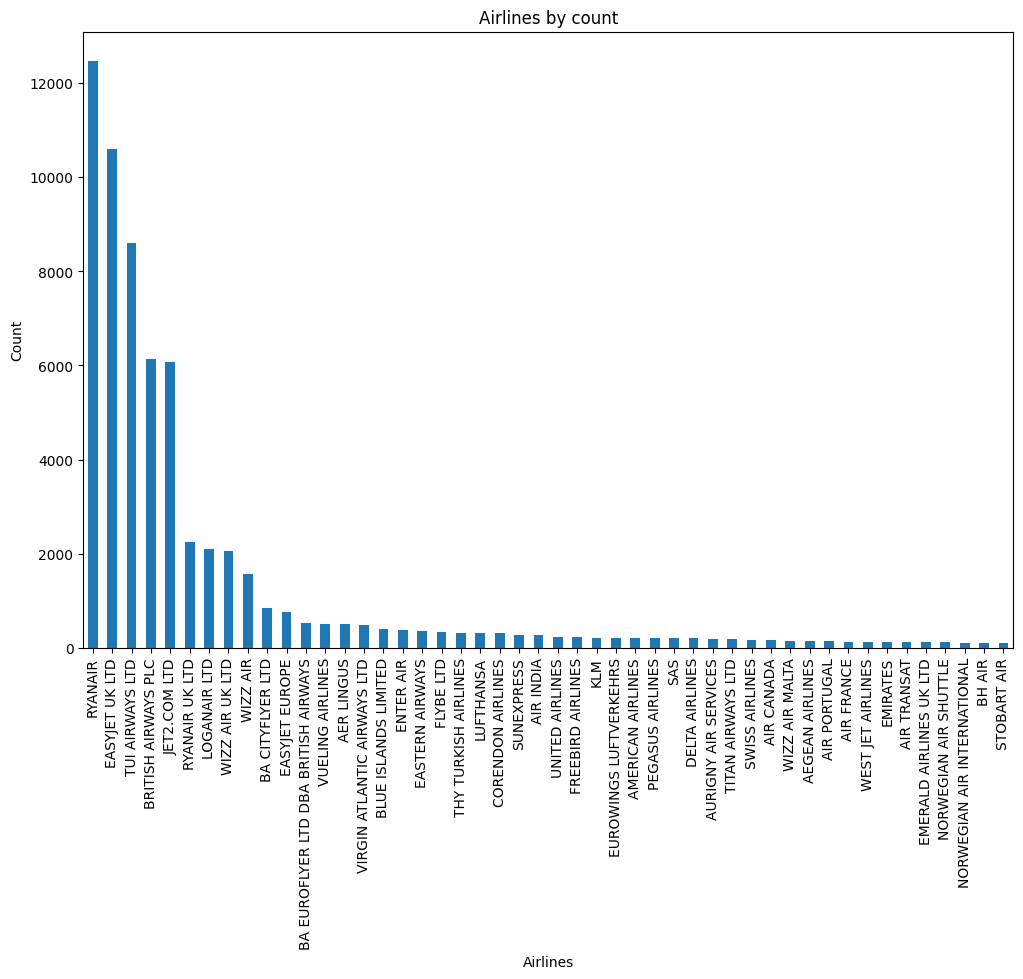

In [171]:
#plot the airlines by its count
plt.figure(figsize=(12,8))
air_greater_than_100.plot(kind='bar')
plt.title('Airlines by count')
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.show()

In [172]:
#plot the airlines by its count
import plotly.express as px

# Create a bar chart using Plotly Express
fig = px.bar(df_deduped['airline_name'].value_counts().head(10), 
            x=df_deduped['airline_name'].value_counts().head(10).index, 
            y=df_deduped['airline_name'].value_counts().head(10).values,
            labels={'x': 'Airline', 'y': 'Count'},
            title='Most Popular Airlines by Count',
            color=df_deduped['number_flights_matched'].value_counts().head(10).values,
            color_continuous_scale='Viridis')

# Customize the layout
fig.update_layout(
    xaxis={'title': 'Airline'},
    yaxis={'title': 'Count'},
    height=500,
    width=800
)

# Show the chart
fig.show()

'''hover_data={'x': df_deduped['airline_name'].value_counts().head(10).index,
                        'y': df_deduped['airline_name'].value_counts().head(10).values},'''

"hover_data={'x': df_deduped['airline_name'].value_counts().head(10).index,\n                        'y': df_deduped['airline_name'].value_counts().head(10).values},"

In [173]:
#select the columns that are numeric
numeric = df_deduped.select_dtypes(include=['number'])

In [174]:
numeric.head()

number_flights_matched  actual_flights_unmatched  number_flights_cancelled  \
0                       4                         0                         0   
1                      17                         0                         0   
3                      56                         0                         3   
4                       9                         0                         0   
5                       5                         0                         0   

   flights_more_than_15_minutes_early_percent  \
0                                    0.000000   
1                                   17.647059   
3                                   15.254237   
4                                    0.000000   
5                                    0.000000   

   flights_15_minutes_early_to_1_minute_early_percent  \
0                                          25.000000    
1                                          35.294118    
3                                          25.423729    
4                                          44.444444    
5                                          40.000000    

   flights_0_to_15_minutes_late_percent  \
0                              0.000000   
1                             23.529412   
3                             25.423729   
4                             33.333333   
5                             20.000000   

   flights_between_16_and_30_minutes_late_percent  \
0                                       50.000000   
1                                        5.882353   
3                                        6.779661   
4                                        0.000000   
5                                       20.000000   

   flights_between_31_and_60_minutes_late_percent  \
0                                       25.000000   
1                                        5.882353   
3                                       10.169492   
4                                       11.111111   
5                                       20.000000   

   flights_between_61_and_120_minutes_late_percent  \
0                                         0.000000   
1                                         0.000000   
3                                         6.779661   
4                                         0.000000   
5                                         0.000000   

   flights_between_121_and_180_minutes_late_percent  \
0                                          0.000000   
1                                         11.764706   
3                                          3.389831   
4                                         11.111111   
5                                          0.000000   

   flights_between_181_and_360_minutes_late_percent  \
0                                          0.000000   
1                                          0.000000   
3                                          1.694915   
4                                          0.000000   
5                                          0.000000   

   flights_more_than_360_minutes_late_percent  average_delay_mins  \
0                                         0.0                19.0   
1                                         0.0                22.0   
3                                         0.0                23.0   
4                                         0.0                22.0   
5                                         0.0                18.0   

   arrival_departure_A  arrival_departure_D  scheduled_charter_C  \
0                    0                    1                    0   
1                    1                    0                    0   
3                    1                    0                    0   
4                    0                    1                    1   
5                    0                    1                    0   

   scheduled_charter_S  
0                    1  
1                    1  
3                    1  
4                    0  
5                    1

In [175]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5742 entries, 0 to 66439
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   number_flights_matched                              5742 non-null   int64  
 1   actual_flights_unmatched                            5742 non-null   int64  
 2   number_flights_cancelled                            5742 non-null   int64  
 3   flights_more_than_15_minutes_early_percent          5742 non-null   float64
 4   flights_15_minutes_early_to_1_minute_early_percent  5742 non-null   float64
 5   flights_0_to_15_minutes_late_percent                5742 non-null   float64
 6   flights_between_16_and_30_minutes_late_percent      5742 non-null   float64
 7   flights_between_31_and_60_minutes_late_percent      5742 non-null   float64
 8   flights_between_61_and_120_minutes_late_percent     5742 non-null   float64
 9   f

In [176]:
# Scale the numerical columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_deduped[numeric.astype(bool)])

d:\5th sem\DeepLearnig\Dash_plotly\dash\lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning:

invalid value encountered in divide

d:\5th sem\DeepLearnig\Dash_plotly\dash\lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning:

invalid value encountered in divide

d:\5th sem\DeepLearnig\Dash_plotly\dash\lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning:

invalid value encountered in divide



In [177]:
from sklearn.impute import SimpleImputer

# Replace missing values with mean
imputer = SimpleImputer(strategy='mean')
df_scaled = imputer.fit_transform(df_scaled)

d:\5th sem\DeepLearnig\Dash_plotly\dash\lib\site-packages\sklearn\impute\_base.py:577: UserWarning:

Skipping features without any observed values: [ 0  1  2  3  4 22 23 24]. At least one non-missing value is needed for imputation with strategy='mean'.



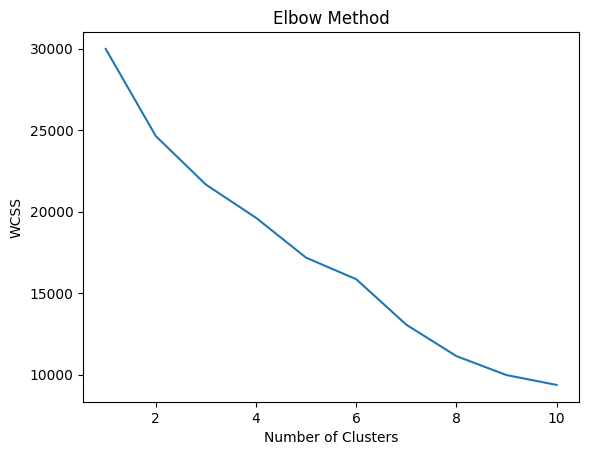

In [178]:
# Initialize an empty list to store the WCSS values
wcss = []

# Iterate over a range of cluster numbers
for i in range(1, 11):
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    
    # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [179]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_deduped['Cluster'] = kmeans.fit_predict(df_scaled)

C:\Users\dkout\AppData\Local\Temp\ipykernel_25424\2662339474.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [180]:
import plotly.graph_objects as go
import pandas as pd

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
        z=numeric.corr(),
        x=numeric.columns,
        y=numeric.columns,
        colorscale='Viridis',
        colorbar=dict(title='Correlation')
))

# Add title
fig.update_layout(
    title='Correlation Heatmap'
)
# Add title and increase figure size
fig.update_layout(
    title='Correlation Heatmap',
    width=1000,  # specify the width of the figure
    height=800  # specify the height of the figure
)

# Show the plot
fig.show()

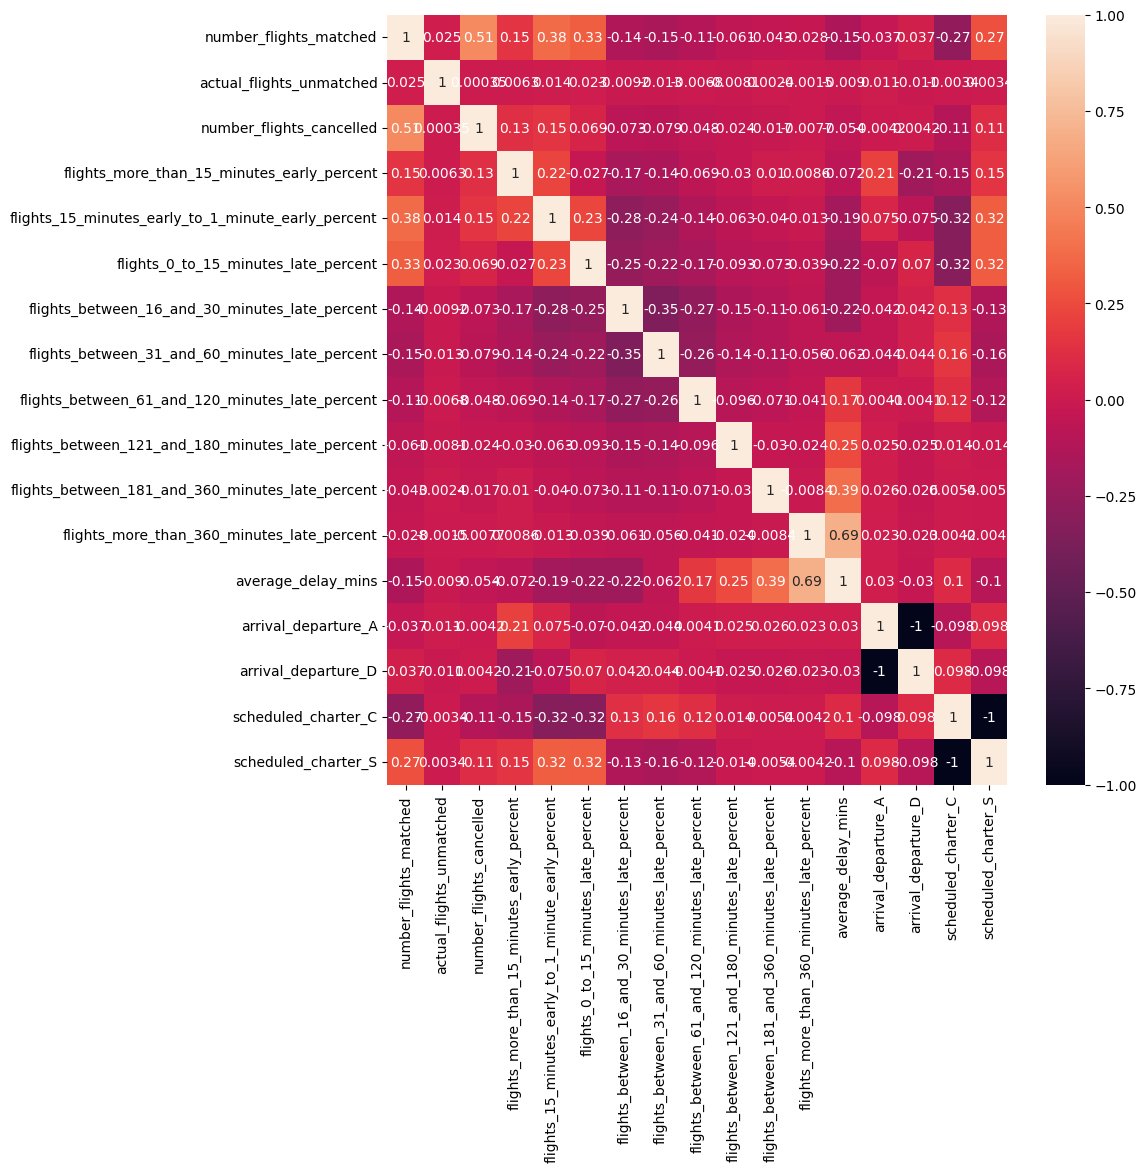

In [181]:
# Drop columns with string values
#df_numeric = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10,10))
sns.heatmap(numeric.corr(), annot=True)
plt.show()

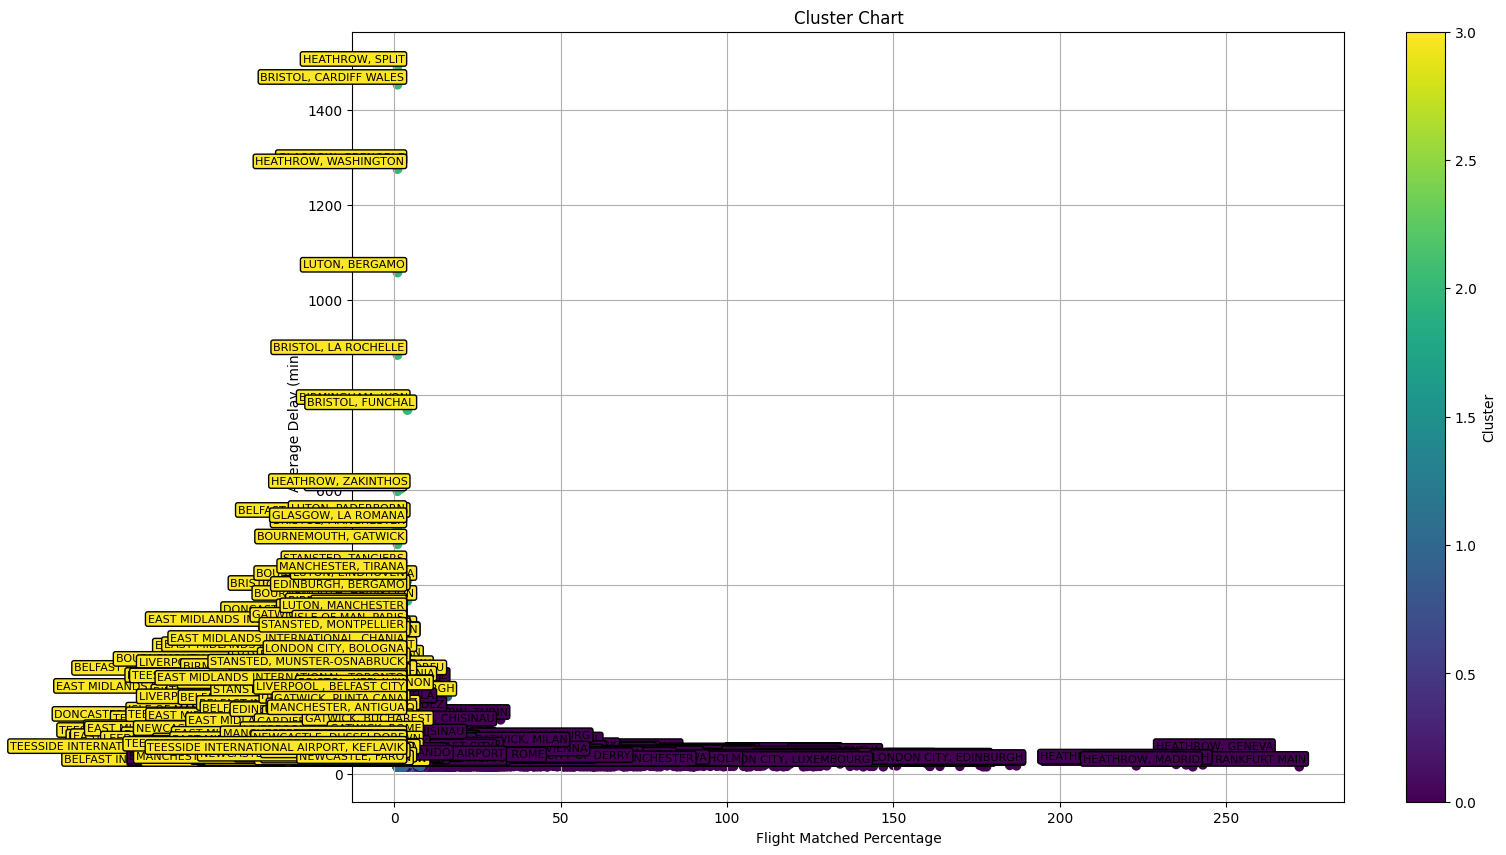

In [182]:
plt.figure(figsize=(16, 10))
scatter = plt.scatter(df_deduped['number_flights_matched'], df_deduped['average_delay_mins'], 
                    c=df_deduped['Cluster'], cmap='viridis')

for i, txt in enumerate(df_deduped['journey']):
    x, y = df_deduped.iloc[i]['number_flights_matched'], df_deduped.iloc[i]['average_delay_mins']
    plt.annotate(txt, xy=(x, y), xytext=(5, 2), textcoords='offset points', fontsize=8, 
                bbox=dict(boxstyle='round,pad=0.2', fc=scatter.get_cmap()(scatter.get_array()[i % len(scatter.get_array())])), 
                ha='right', va='bottom')

plt.title('Cluster Chart')
plt.xlabel('Flight Matched Percentage')
plt.ylabel('Average Delay (mins)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

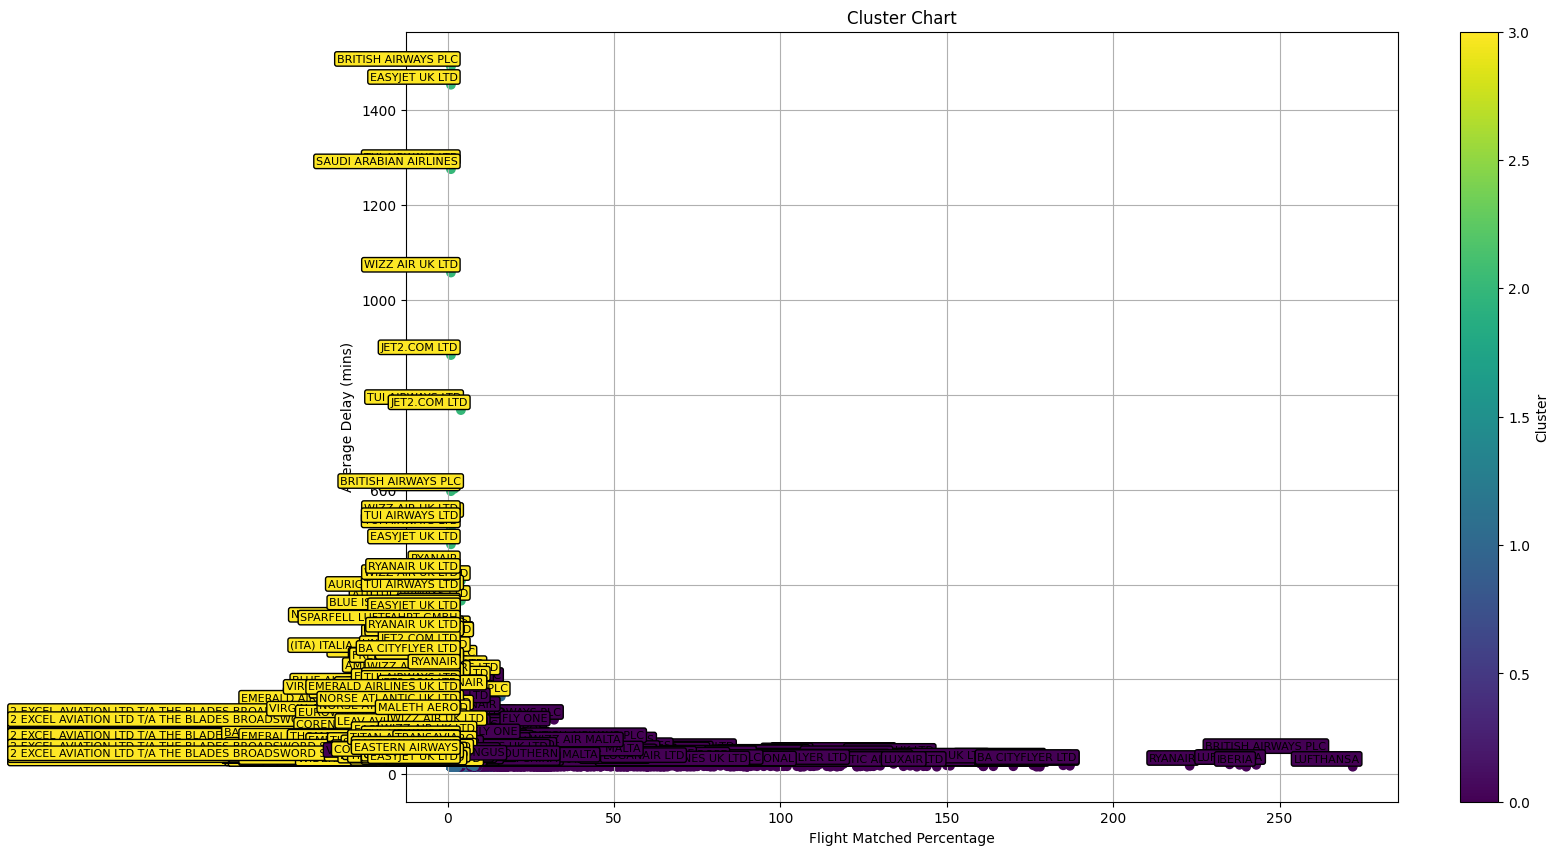

In [183]:
plt.figure(figsize=(16, 10))
scatter = plt.scatter(df_deduped['number_flights_matched'], df_deduped['average_delay_mins'], 
                    c=df_deduped['Cluster'], cmap='viridis')

for i, txt in enumerate(df_deduped['airline_name']):    
    x, y = df_deduped.iloc[i]['number_flights_matched'], df_deduped.iloc[i]['average_delay_mins']
    plt.annotate(txt, xy=(x, y), xytext=(5, 2), textcoords='offset points', fontsize=8, 
                bbox=dict(boxstyle='round,pad=0.2', fc=scatter.get_cmap()(scatter.get_array()[i % len(scatter.get_array())])), 
                ha='right', va='bottom')

plt.title('Cluster Chart')
plt.xlabel('Flight Matched Percentage')
plt.ylabel('Average Delay (mins)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [184]:
import plotly.graph_objects as go

# Create a scatter plot
fig = go.Figure(data=go.Scatter(
    x=df_deduped['number_flights_matched'],
    y=df_deduped['average_delay_mins'],
    mode='markers',
    marker=dict(
        size=10,
        color=df_deduped['Cluster'],
        colorscale='Viridis',
        showscale=True
    ),
    text=df_deduped['airline_name']
))

# Customize the layout
fig.update_layout(
    title='Flight Matched vs Average Delay',
    xaxis=dict(title='Flight Matched Percentage'),
    yaxis=dict(title='Average Delay (mins)'),
    width=800,
    height=600
)

# Show the plot
fig.show()

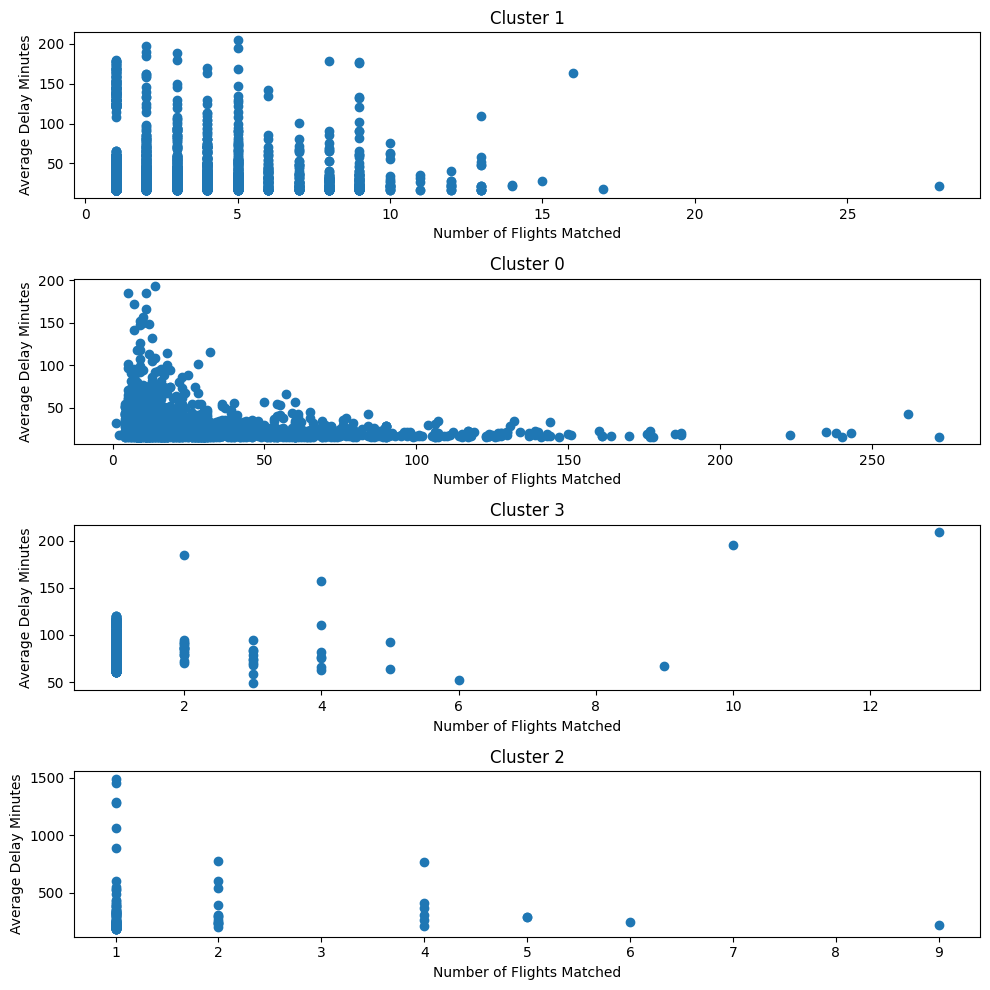

In [185]:
fig, axs = plt.subplots(nrows=len(df_deduped['Cluster'].unique()), figsize=(10, 10))

for i, cluster in enumerate(df_deduped['Cluster'].unique()):
    cluster_df = df_deduped[df_deduped['Cluster'] == cluster]
    axs[i].scatter(cluster_df['number_flights_matched'], cluster_df['average_delay_mins'])
    axs[i].set_title(f'Cluster {cluster}')
    axs[i].set_xlabel('Number of Flights Matched')
    axs[i].set_ylabel('Average Delay Minutes')

plt.tight_layout()
plt.show()

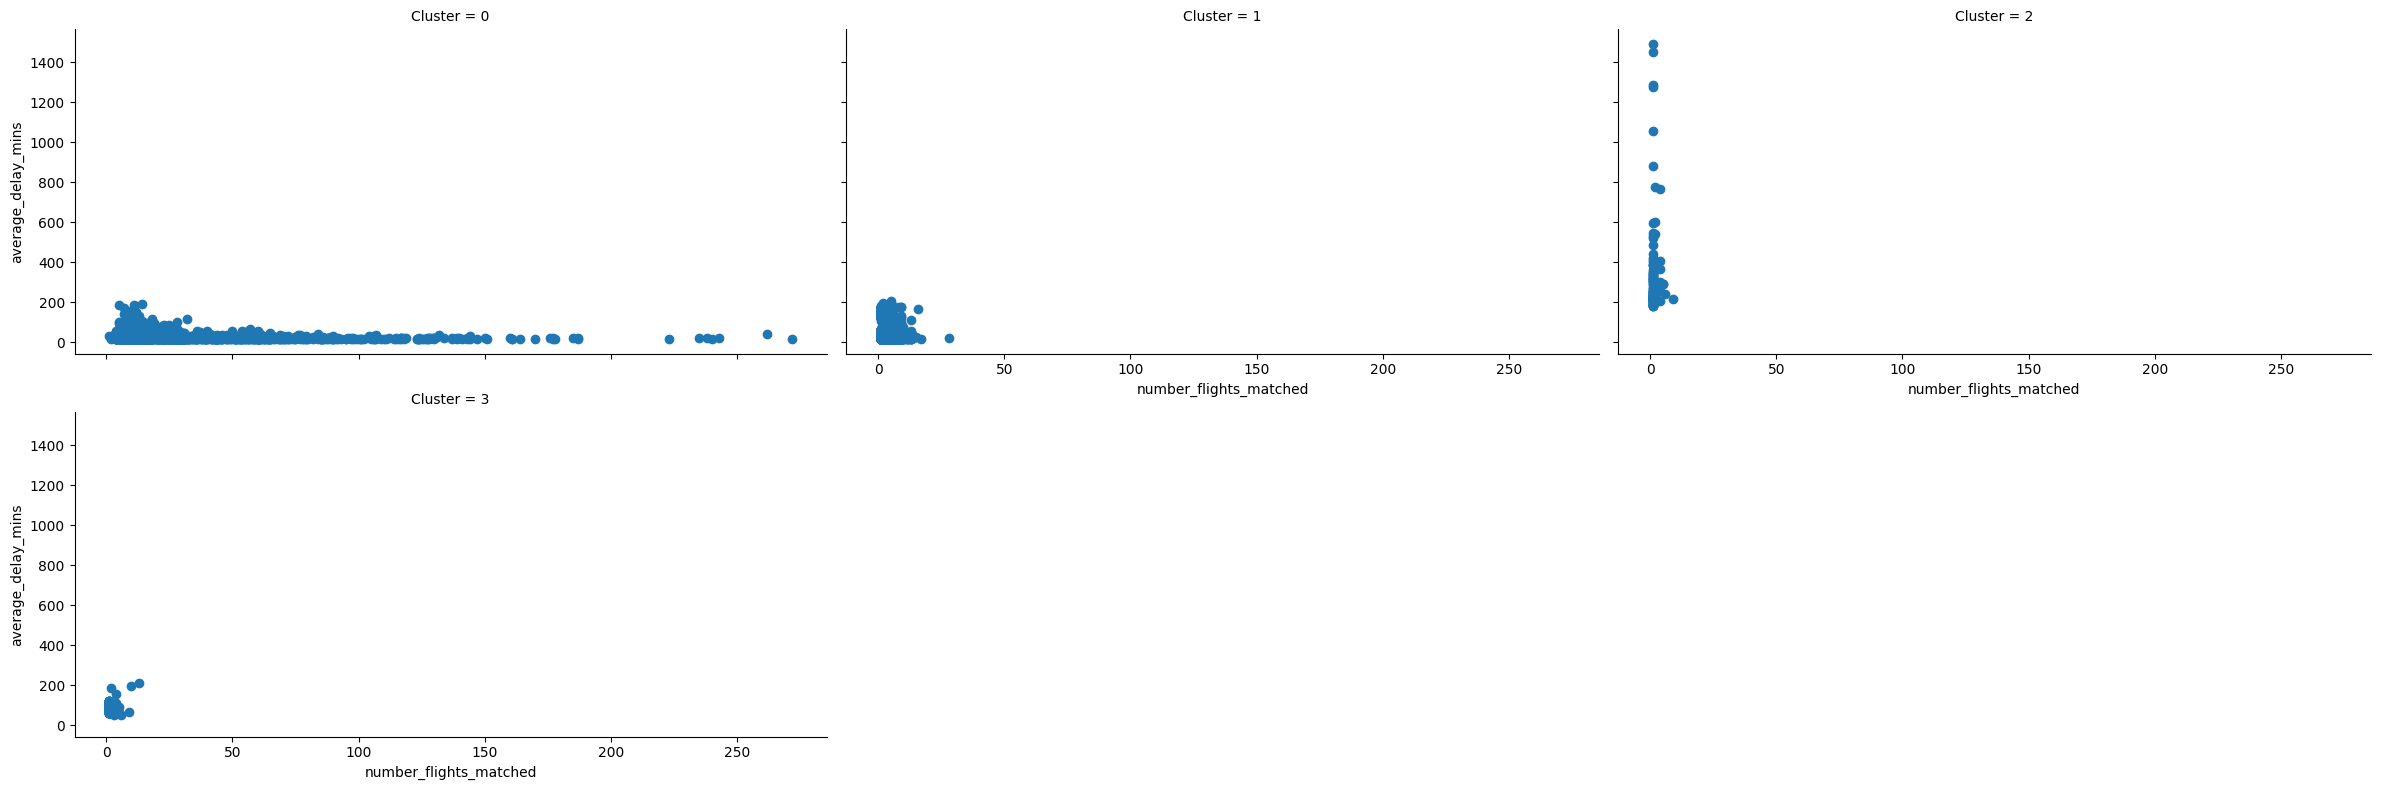

In [186]:
import seaborn as sns

g = sns.FacetGrid(df_deduped, col='Cluster', col_wrap=3, height=4, aspect=2)
g.map(plt.scatter, 'number_flights_matched', 'average_delay_mins')
g.add_legend()

In [187]:


'''import seaborn as sns

g = sns.FacetGrid(df_deduped, col='Cluster', col_wrap=3, height=4, aspect=2)
g.map(plt.scatter, 'number_flights_matched', 'average_delay_mins')
g.add_legend()'''

import plotly.express as px

fig = px.scatter(df_deduped, x='number_flights_matched', y='average_delay_mins', color='Cluster')
fig.update_layout(
    title='Average Delay Minutes vs Number of Flights Matched by Cluster',
    xaxis_title='Number of Flights Matched',
    yaxis_title='Average Delay Minutes',
    legend_title='Cluster'
)
fig.update_xaxes(range=[0, df_deduped['number_flights_matched'].max()])
fig.update_yaxes(range=[0, df_deduped['average_delay_mins'].max()])
fig.update_layout(autosize=False, width=800, height=600, margin=dict(l=50, r=50, b=50, t=50))
fig.show()

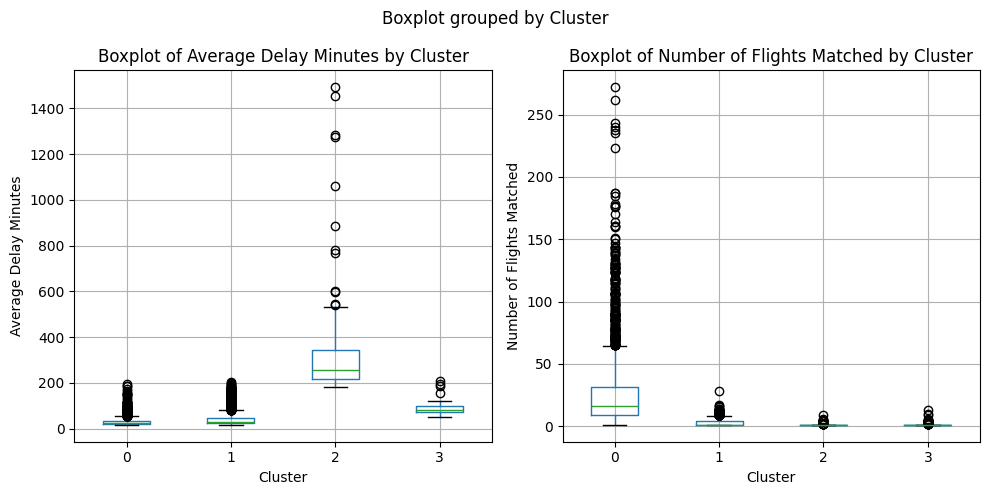

In [188]:
# Plot the boxplot of average delay minutes by cluster

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

df_deduped.boxplot(column='average_delay_mins', by='Cluster', ax=axs[0])
df_deduped.boxplot(column='number_flights_matched', by='Cluster', ax=axs[1])

axs[0].set_title('Boxplot of Average Delay Minutes by Cluster')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Average Delay Minutes')

axs[1].set_title('Boxplot of Number of Flights Matched by Cluster')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Number of Flights Matched')

plt.tight_layout()
plt.show()


**Average Delay Minutes boxplot:**

1.There is a noticeable difference in average delay minutes between the clusters. Cluster 3 has a lower average delay compared to the other clusters.

2.Clusters 0, 1 have similar average delay minutes, but Cluster 2 has a slightly larger spread, indicating more variability in delay minutes.

3.Cluster 2 has the highest average delay minutes, with many outliers, suggesting that flights in this cluster are more likely to experience long delays.

**Number of Flights Matched boxplot:**

1.Cluster 3 has the highest number of flights matched, while Cluster 2 has the lowest.

2.Clusters 1, 2 have similar numbers of flights matched, with Cluster 3 having a slightly larger spread compared to the others.

3.Cluster 3 has significant amount of outliers in the Number of Flights Matched boxplots, suggesting that the data points are over-distributed.

In [189]:
from plotly.subplots import make_subplots

import plotly.graph_objects as go
# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2)

# Add the first boxplot to the first subplot
fig.add_trace(go.Box(x=df_deduped['Cluster'], y=df_deduped['average_delay_mins'], name='Average Delay Minutes'), row=1, col=1)

# Add the second boxplot to the second subplot
fig.add_trace(go.Box(x=df_deduped['Cluster'], y=df_deduped['number_flights_matched'], name='Number of Flights Matched'), row=1, col=2)

# Update the layout
fig.update_layout(title='Boxplots of Average Delay Minutes and Number of Flights Matched by Cluster',
                xaxis1_title='Cluster', yaxis1_title='Average Delay Minutes',
                xaxis2_title='Cluster', yaxis2_title='Number of Flights Matched')

# Show the figure
fig.show()

'''import plotly.express as px

fig = px.box(df_deduped, x='Cluster', y='average_delay_mins', title='Boxplot of Average Delay Minutes by Cluster')
fig.update_layout(xaxis_title='Cluster', yaxis_title='Average Delay Minutes')

fig2 = px.box(df_deduped, x='Cluster', y='number_flights_matched', title='Boxplot of Number of Flights Matched by Cluster')
fig2.update_layout(xaxis_title='Cluster', yaxis_title='Number of Flights Matched')

fig.show()
fig2.show()'''


"import plotly.express as px\n\nfig = px.box(df_deduped, x='Cluster', y='average_delay_mins', title='Boxplot of Average Delay Minutes by Cluster')\nfig.update_layout(xaxis_title='Cluster', yaxis_title='Average Delay Minutes')\n\nfig2 = px.box(df_deduped, x='Cluster', y='number_flights_matched', title='Boxplot of Number of Flights Matched by Cluster')\nfig2.update_layout(xaxis_title='Cluster', yaxis_title='Number of Flights Matched')\n\nfig.show()\nfig2.show()"

In [190]:
cluster_airline_counts = df_deduped.groupby(['Cluster']).size()
cluster_airline_counts

Cluster
0    2119
1    3087
2     111
3     425
dtype: int64

[[ 3.22288025e+00  4.09916975e-03]
 [-2.06020694e-01 -2.62036977e-04]]


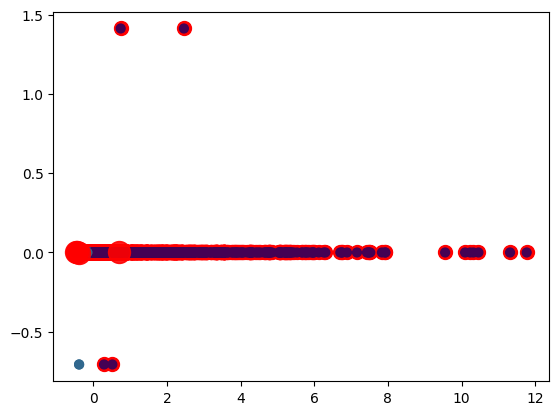

ValueError: X has 2 features, but KMeans is expecting 17 features as input.

In [191]:
from sklearn.cluster import KMeans
# Create a new KMeans model with 2 clusters
kmeans_new = KMeans(n_clusters=2, random_state=42)

# Fit the model to the input data with 2 features
kmeans_new.fit(df_scaled[:, :2])

# Check the cluster centers
print(kmeans_new.cluster_centers_)
plt.scatter(df_scaled[df_deduped['Cluster'] == 0, 0], df_scaled[df_deduped['Cluster'] == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
import matplotlib.pyplot as plt

#plt.scatter(df_deduped['number_flights_matched'], df_deduped['average_delay_mins'], 
                    #c=df_deduped['Cluster'], cmap='viridis')

plt.scatter(df_scaled[:,0], df_scaled[:,1], c=kmeans.labels_, s=40)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=250, alpha=.9)
plt.show()

#predicting  new data points to be in which cluster they belong
new_point = [[3,8]]
prediction = kmeans.predict([[3,8]])
print("Predicted Cluster for New Point: ", prediction)


In [ ]:
#number of flight matched group by airline name and show all groups
df_deduped.groupby('airline_name')['number_flights_matched'].sum().sort_values(ascending=False)   #.plot(kind='bar', figsize=(10, 6))

airline_name
EASYJET UK LTD              12346
RYANAIR                     10172
BRITISH AIRWAYS PLC          7712
JET2.COM LTD                 4417
TUI AIRWAYS LTD              3150
                            ...  
JAZEERA AIRWAYS K.S.C.P         1
BEIJING CAPITAL AIRLINES        1
TNT AIRWAYS                     1
AVIES AIR COMPANY               1
NATIONAL AIR CARGO              1
Name: number_flights_matched, Length: 262, dtype: int64

# Feature selection

In [ ]:
#selecting the most relevant features
x = df_deduped[['number_flights_matched','average_delay_mins']]

# Agglomarative clustering

generating cluster labels for the existing data points based on their features

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Perform hierarchical clustering on the sampled data
linked = linkage(x, 'ward')


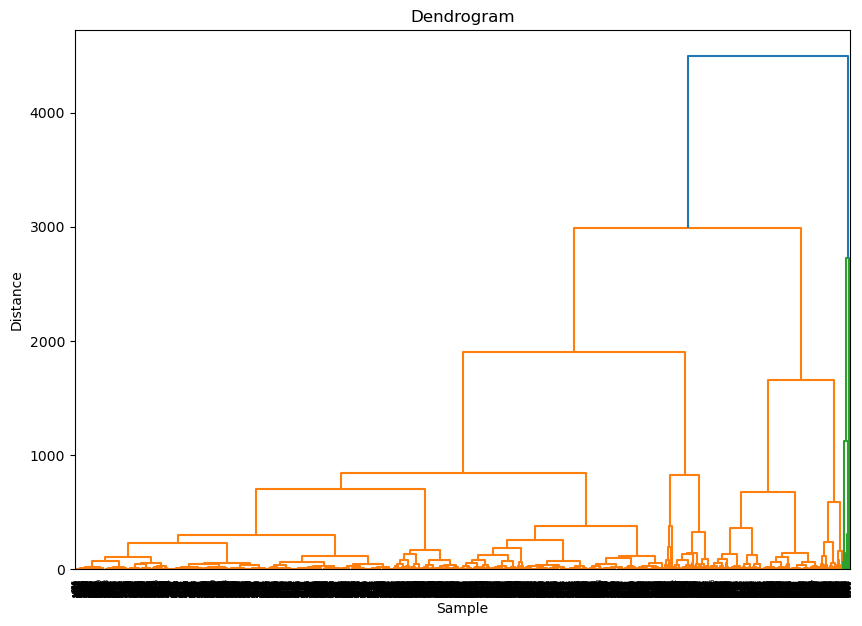

In [ ]:
plt.figure(figsize=(10,7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.show()

Training the model with 4 clusters using Euclidean distance and 'ward' linkage

In [ ]:
# Perform hierarchical clustering on the sampled data

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


First, it performs the clustering based on the selected features.

Then, it assigns a cluster label to each data point.

Finally, it returns an array of cluster labels corresponding to the original data points.

In [ ]:
#defining second cluster group

df_deduped['clustert'] = y_hc

C:\Users\dkout\AppData\Local\Temp\ipykernel_608\491622167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deduped['clustert'] = y_hc


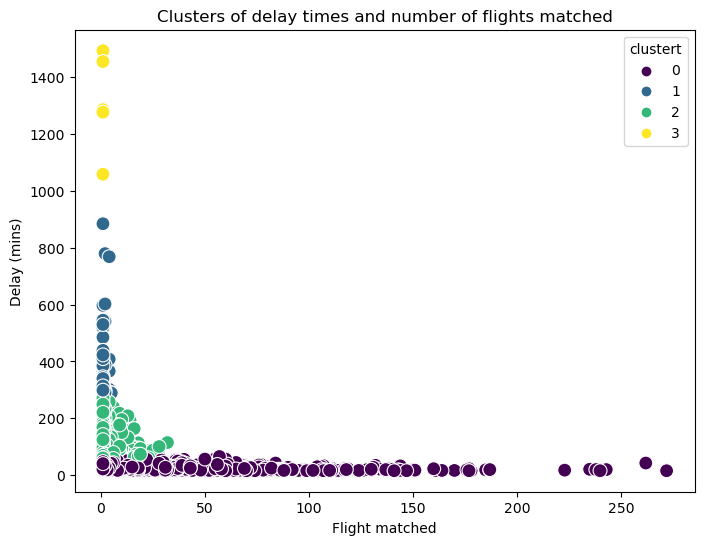

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='number_flights_matched', y='average_delay_mins', hue='clustert', 
                data=df_deduped, palette='viridis', s=100)
plt.title('Clusters of delay times and number of flights matched')
plt.xlabel('Flight matched')
plt.ylabel('Delay (mins)')
plt.show()

Check **silhouette** score and determine cls as 4

In [ ]:
df_deduped_num = df_deduped.select_dtypes(include=['number'])

silhouette_score = metrics.silhouette_score(df_deduped_num, y_hc, metric='euclidean')
print(silhouette_score)

0.3547354254987011


In [ ]:
import plotly.express as px

fig = px.scatter(df_deduped, x='average_delay_mins', y='number_flights_matched', color='Cluster', hover_data=['journey'])
fig.update_layout(title='Cluster Chart', xaxis_title='Average Delay (mins)', yaxis_title='Flight Matched Percentage')
fig.show()


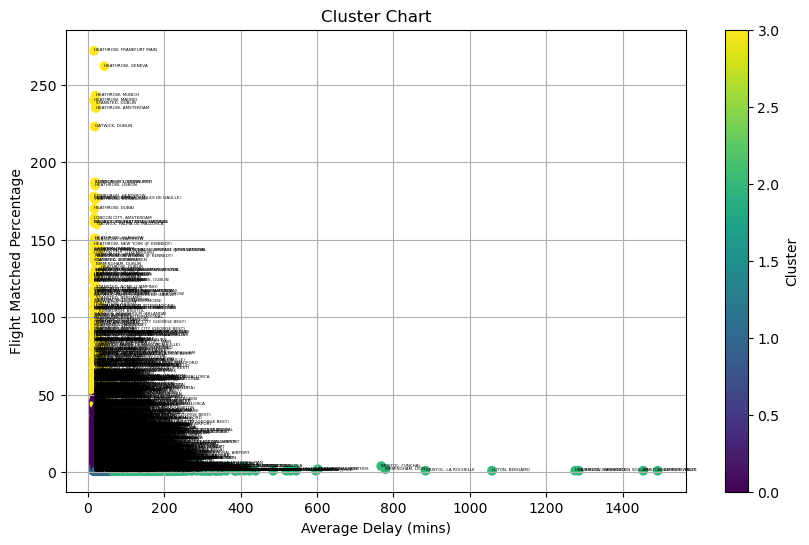

In [ ]:
# Plot the clusters with data labels besides to point
plt.figure(figsize=(10, 6))
plt.scatter(df_deduped['average_delay_mins'], df_deduped['number_flights_matched'], c=df_deduped['Cluster'], cmap='viridis')

for i, txt in enumerate(df_deduped['journey']):
    plt.annotate(txt, (df_deduped.iloc[i]['average_delay_mins'], df_deduped.iloc[i]['number_flights_matched']), fontsize=3)

plt.title('Cluster Chart')
plt.xlabel('Average Delay (mins)')
plt.ylabel('Flight Matched Percentage')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

PLot **3D** plots

In [ ]:
import plotly.graph_objs as go 
import plotly.offline as py 

In [ ]:
# Generate hover text for each data point
hover_text = []
for i in df_deduped.index:
    hover_text.append(f"Matched Flights: {df_deduped.loc[i,'number_flights_matched']}<br>Average Delay:{df_deduped.loc[i, 'average_delay_mins']}<br>Unmatched Flights:{df_deduped.loc[i, 'actual_flights_unmatched']}<br>Cluster:{df_deduped.loc[i,  'clustert']}<br>Route:{df_deduped.loc[i, 'journey']}<br>Air Line:{df_deduped.loc[i,  'airline_name']}")

In [ ]:
sample = go.Scatter3d(
    x=df_deduped['number_flights_matched'], y=df_deduped['average_delay_mins'], z=df_deduped['actual_flights_unmatched'],
    mode='markers',
    marker=dict(color=df_deduped['clustert'], size=5, line=dict(color=df_deduped['clustert'],
            width=16), opacity=0.6),
    hovertext=hover_text,  # Add hover text to the trace

)

data_plt = [sample]
layout = go.Layout(title='Clusters using Agglomerative Clustering Algorithm',
                scene=dict(
                    xaxis=dict(title='Matched Flights'),
                    yaxis=dict(title='Average Delay'),
                    zaxis=dict(title='Unmatched Flights')),
                # increase the size of the plot
                width=800,
                height=800
                )

fig = go.Figure(data=data_plt, layout=layout)
py.iplot(fig)